# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

## Import Statements

In [151]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"Shape of \ndf_hh_income: {df_hh_income.shape} \ndf_pct_poverty: {df_pct_poverty.shape} \ndf_pct_completed_hs: {df_pct_completed_hs.shape} \ndf_share_race_city: {df_share_race_city.shape} \ndf_fatalities: {df_fatalities.shape}")

Shape of 
df_hh_income: (29322, 3) 
df_pct_poverty: (29329, 3) 
df_pct_completed_hs: (29329, 3) 
df_share_race_city: (29268, 7) 
df_fatalities: (2535, 14)


In [6]:
print(f"Column names of \ndf_hh_income: {df_hh_income.columns} \ndf_pct_poverty: {df_pct_poverty.columns} \ndf_pct_completed_hs: {df_pct_completed_hs.columns} \ndf_share_race_city: {df_share_race_city.columns} \n df_fatalities: {df_fatalities.columns}")

Column names of 
df_hh_income: Index(['Geographic Area', 'City', 'Median Income'], dtype='object') 
df_pct_poverty: Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object') 
df_pct_completed_hs: Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object') 
df_share_race_city: Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object') 
 df_fatalities: Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [7]:
print(f"Are there NaN values? -> {df_hh_income.isna().values.any()} {df_pct_poverty.isna().values.any()} {df_pct_completed_hs.isna().values.any()} {df_share_race_city.isna().values.any()} {df_fatalities.isna().values.any()}")

Are there NaN values? -> True False False False True


In [8]:
print(f"Are there duplicates? -> {df_hh_income.duplicated().values.any()} {df_pct_poverty.duplicated().values.any()} {df_pct_completed_hs.duplicated().values.any()} {df_share_race_city.duplicated().values.any()} {df_fatalities.duplicated().values.any()}")

Are there duplicates? -> False False False False False


In [9]:
df_hh_income.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [10]:
# Replacing '-' poverty rate values with NaN to drop later (converting to 0 may underrepresent poverty rate in a state)
df_pct_poverty.poverty_rate = df_pct_poverty.poverty_rate.replace('-', np.nan)

In [11]:
df_pct_poverty.dropna(inplace=True)

In [12]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty.poverty_rate)

In [13]:
ave_state_pct_poverty = df_pct_poverty.groupby('Geographic Area').poverty_rate.mean().sort_values(ascending=False)

In [14]:
poverty_state_bar = px.bar(x=ave_state_pct_poverty.index,
                           y=ave_state_pct_poverty.values,
                           title='Average Poverty Rate by State in the USA (includes Washington DC)',
                           color=ave_state_pct_poverty.values,
                           color_continuous_scale='agsunset')
poverty_state_bar.update_layout(xaxis_title='States', yaxis_title='Average Poverty Rate (%)')
poverty_state_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [15]:
df_pct_completed_hs.percent_completed_hs.replace('-', np.nan, inplace=True)
df_pct_completed_hs.dropna(inplace=True)

In [16]:
df_pct_completed_hs.percent_completed_hs = pd.to_numeric(df_pct_completed_hs.percent_completed_hs)

In [17]:
ave_state_completed_hs = df_pct_completed_hs.groupby('Geographic Area').percent_completed_hs.mean().sort_values(ascending=False)

In [18]:
completed_hs_state_bar = px.bar(x=ave_state_completed_hs.index,
                                y=ave_state_completed_hs.values,
                                range_y=[75, 95],
                                title='Average Percentage of Population who Completed HS by State in the USA (includes Washington DC)',
                                color=ave_state_completed_hs.values,
                                color_continuous_scale='viridis')
completed_hs_state_bar.update_layout(xaxis_title='States', yaxis_title='Percentage of Those who Completed HS (for those >25)')
completed_hs_state_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [19]:
poverty_hs_merged = pd.DataFrame({'Average Poverty Rate': ave_state_pct_poverty, 'Percentage Completed HS': ave_state_completed_hs})
poverty_hs_merged.sort_values('Percentage Completed HS', ascending=False, inplace=True)

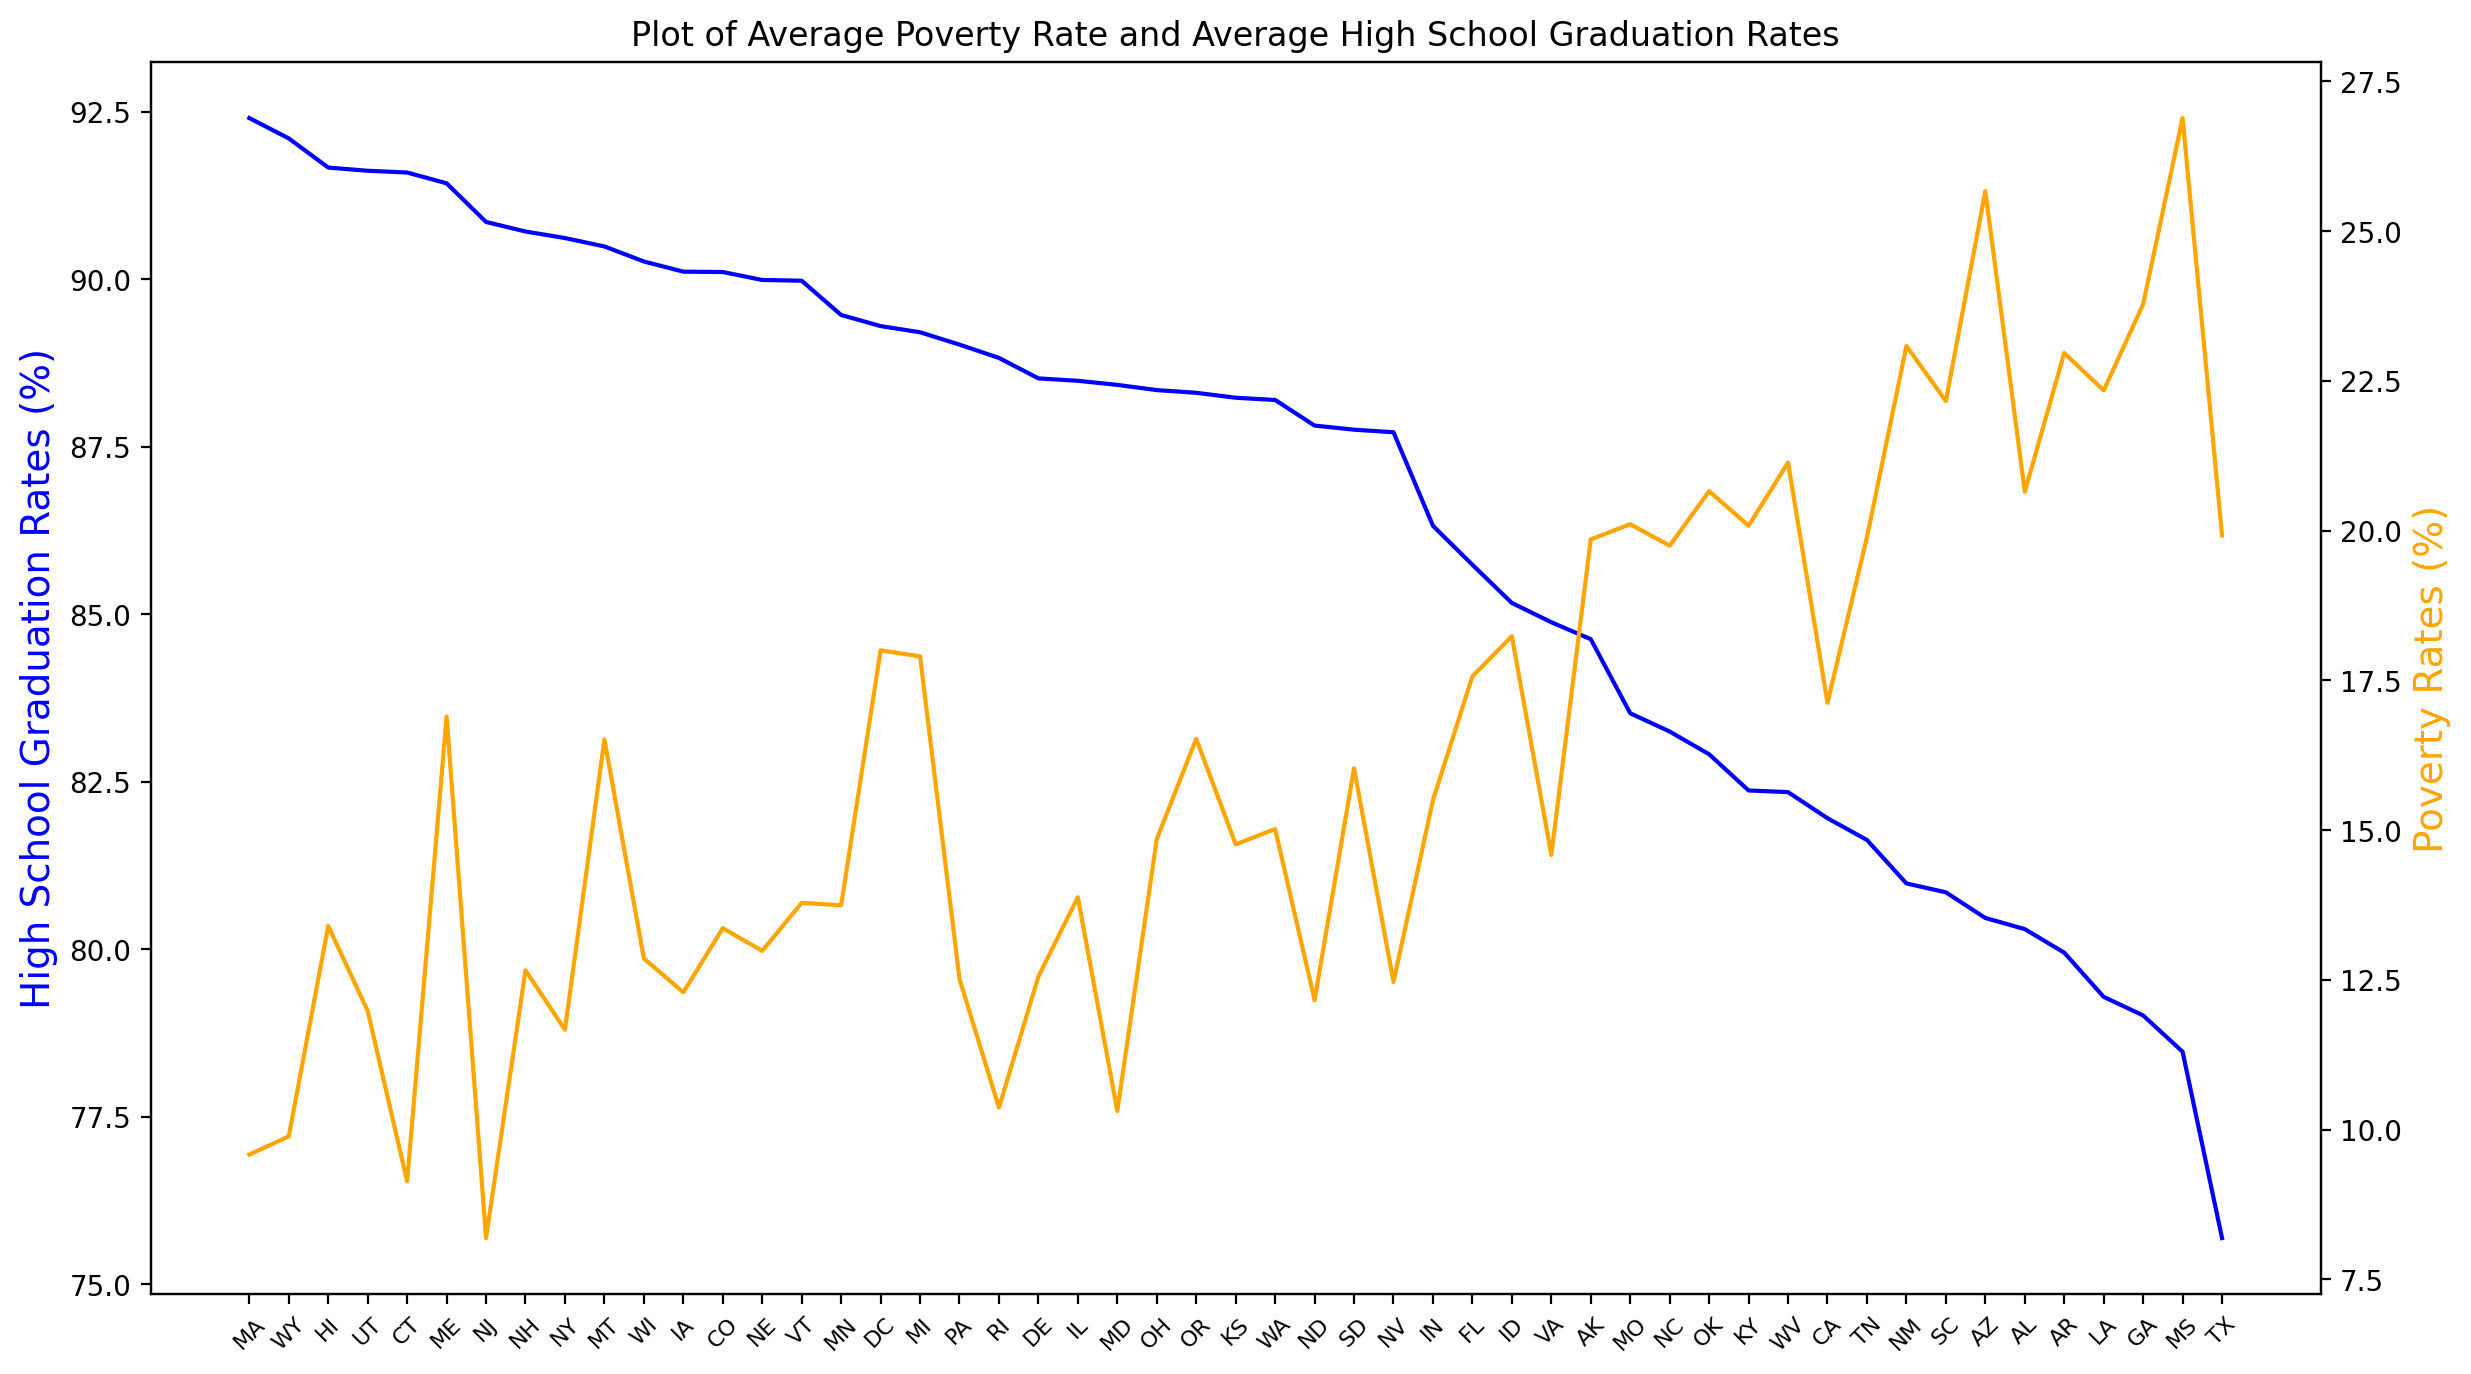

In [20]:
plt.figure(figsize=(14, 8), dpi=200)
plt.xticks(fontsize=8, rotation=45)
plt.title('Plot of Average Poverty Rate and Average High School Graduation Rates')

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('High School Graduation Rates (%)', color='blue', fontsize=14)
ax2.set_ylabel('Poverty Rates (%)', color='orange', fontsize=14)

ax1.plot(poverty_hs_merged.index, poverty_hs_merged['Percentage Completed HS'], color='blue')
ax2.plot(poverty_hs_merged.index, poverty_hs_merged['Average Poverty Rate'], color='orange')

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 2800x1600 with 0 Axes>

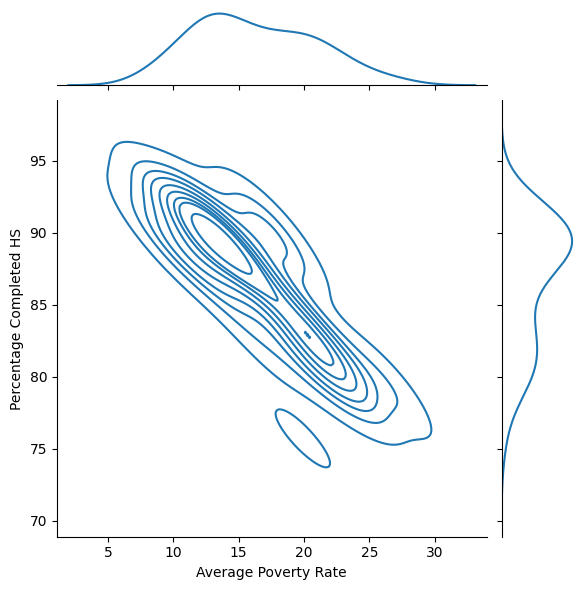

In [21]:
plt.figure(figsize=(14, 8), dpi=200)
sns.jointplot(poverty_hs_merged, x='Average Poverty Rate', y='Percentage Completed HS', kind='kde')

plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

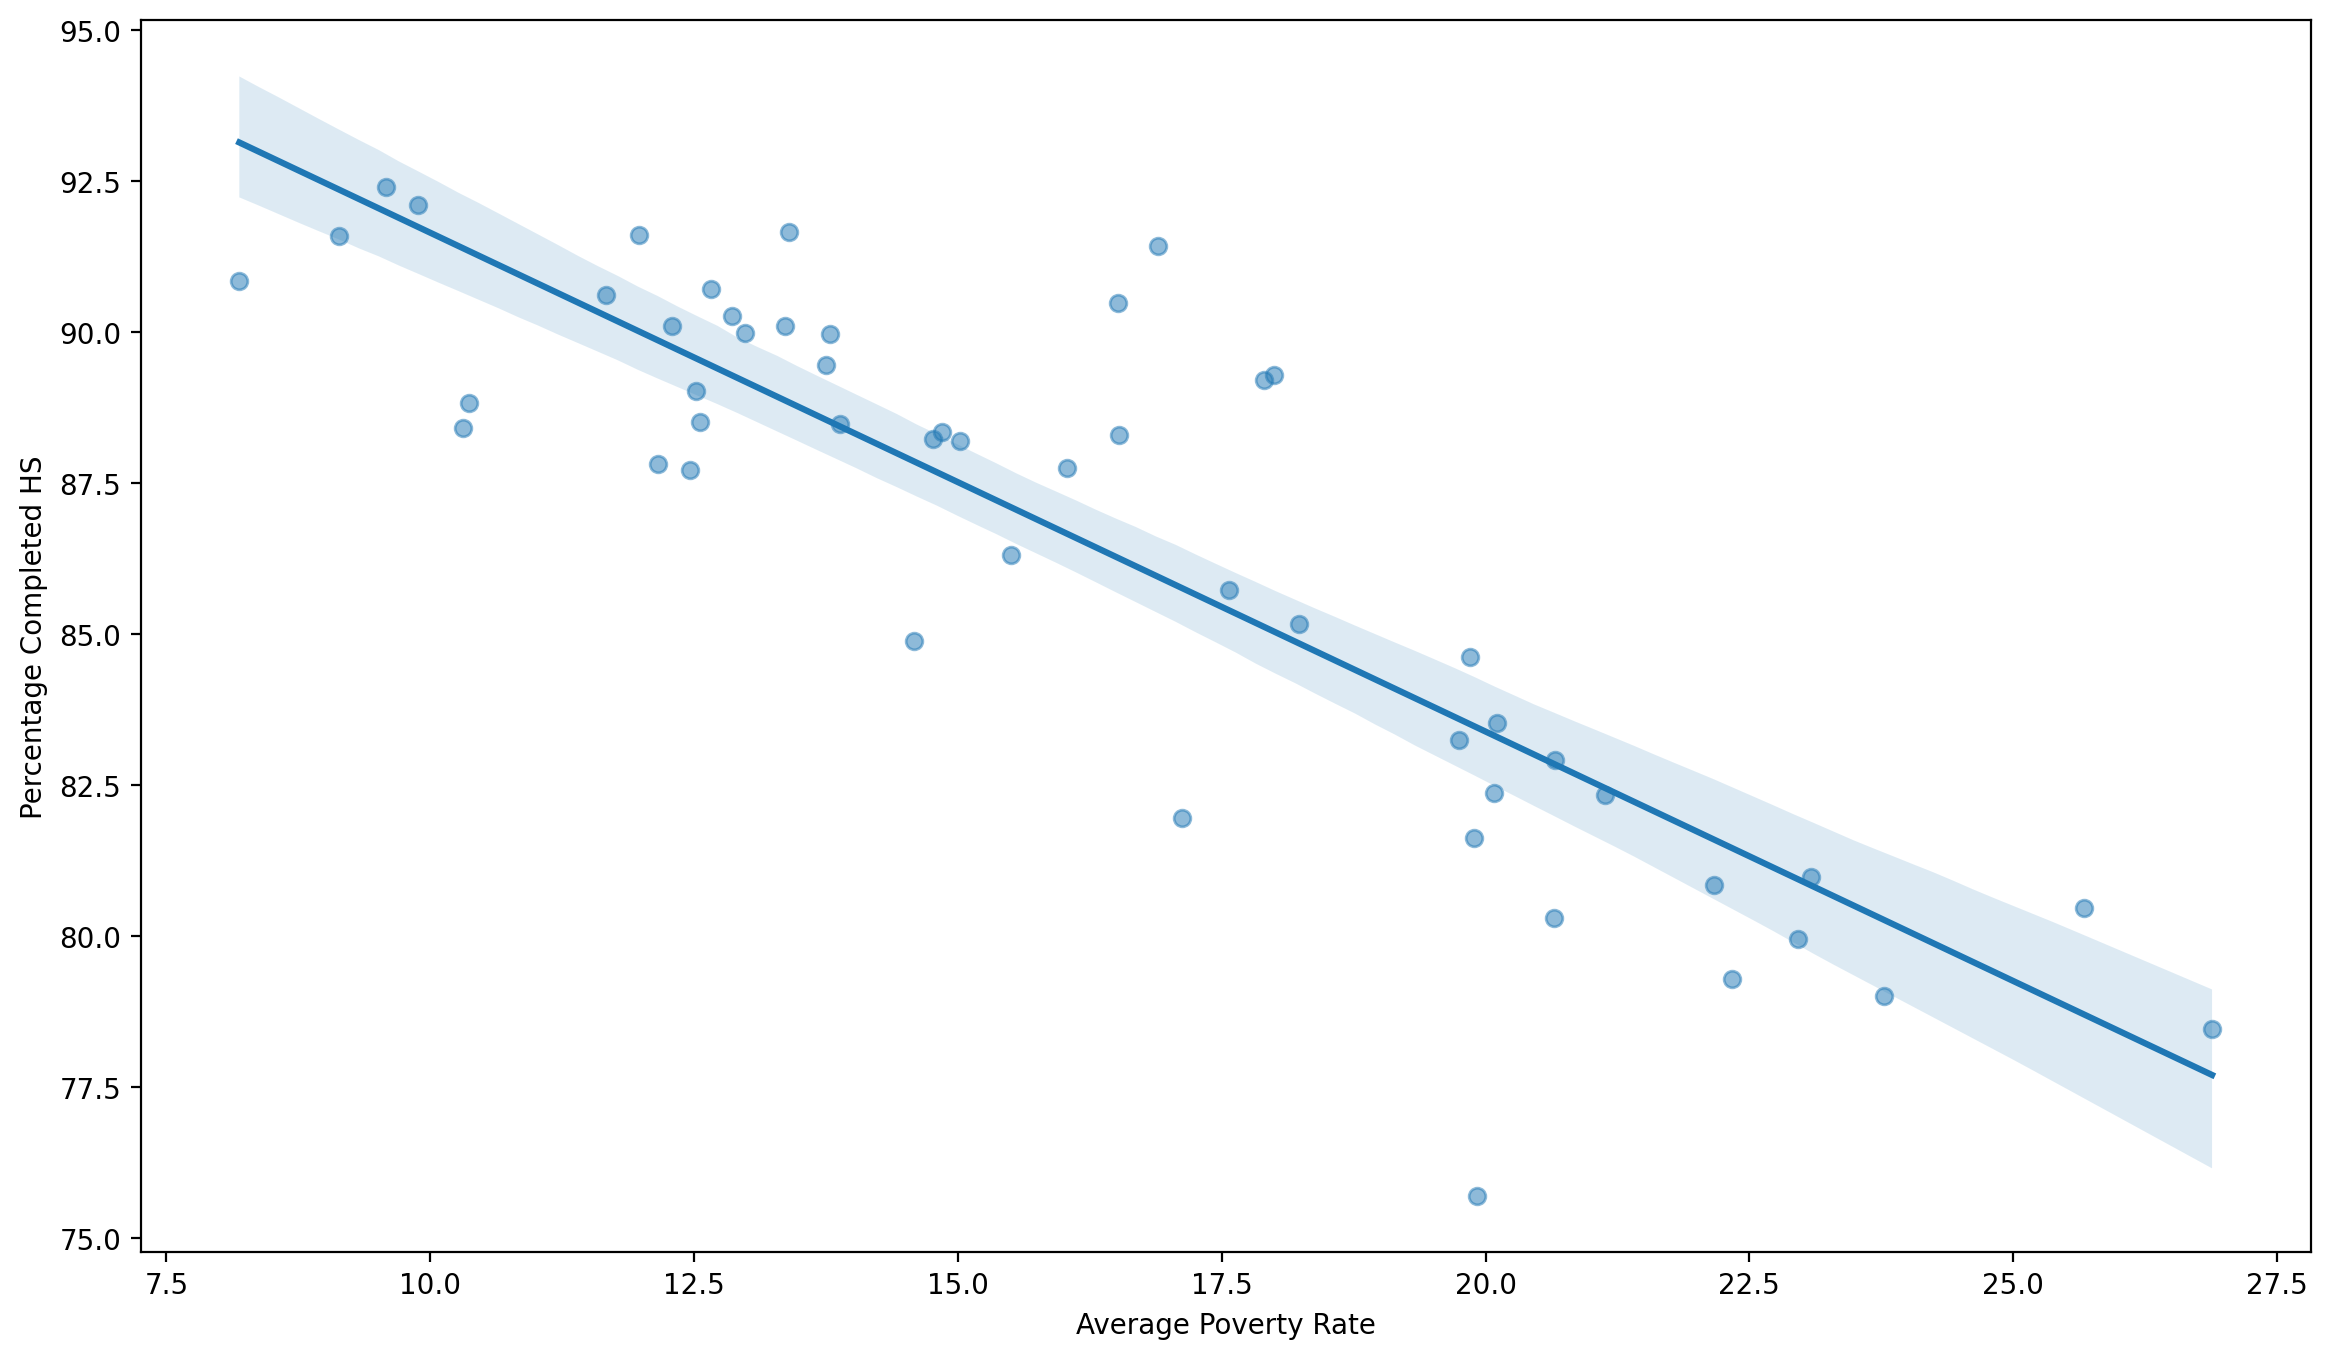

In [22]:
plt.figure(figsize=(14, 8), dpi=200)
sns.regplot(poverty_hs_merged, x='Average Poverty Rate', y='Percentage Completed HS', scatter_kws={'alpha': 0.5})
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [23]:
# Removes rows with - or (X) i.e. missing values
for share_column in df_share_race_city.columns[-5:]:
  df_share_race_city[share_column].replace({'-': np.nan, '(X)': np.nan}, inplace=True)
  df_share_race_city[share_column].dropna(inplace=True)
  df_share_race_city[share_column] = pd.to_numeric(df_share_race_city[share_column])

In [24]:
race_by_state = df_share_race_city.groupby('Geographic area', as_index=False).agg({'share_white': 'mean', 'share_black': 'mean',
                                                                                   'share_native_american': 'mean', 'share_asian': 'mean',
                                                                                   'share_hispanic': 'mean'})

In [25]:
race_by_state_long = pd.melt(race_by_state, id_vars='Geographic area', var_name='Race', value_name='Share')

In [26]:
race_state_bar = px.bar(race_by_state_long,
                        x='Geographic area',
                        y='Share',
                        color='Race',
                        barmode='group',
                        title='Race Share by State')
race_state_bar.update_layout(xaxis_title='State',
                             yaxis_title='Share of race (%)')
race_state_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [27]:
df_fatalities.date = pd.to_datetime(df_fatalities.date, format='%d/%m/%y')

In [28]:
fatalities_by_race = df_fatalities.groupby('race').size()   # Race of 0 represents that the deceased's race is unknown

In [29]:
fatalities_race_donut = px.pie(labels=fatalities_by_race.index,
                               values=fatalities_by_race.values,
                               names={'0': 'Unknown', 'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'N': 'Native American', 'O': 'Other', 'W': 'White'},
                               title="Fatalities by Police sorted by Deceased's Race",
                               hole=0.5
                               )
fatalities_race_donut.update_traces(textposition='outside', textinfo='percent+label')
fatalities_race_donut.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [30]:
fatalities_by_gender = df_fatalities.groupby('gender').size()

In [31]:
fatalities_gender_donut = px.pie(labels=fatalities_by_gender.index,
                                 values=fatalities_by_gender.values,
                                 names={'F': 'Female', 'M': 'Male'},
                                 title="Fatalities by Police sorted by Deceased's Gender",
                                 hole=0.5
                                 )
fatalities_gender_donut.update_traces(textposition='outside', textinfo='percent+label')
fatalities_gender_donut.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [32]:
age_death_box = px.box(df_fatalities,
                       x='gender',
                       y='age',
                       color='gender',
                       notched=True,
                       points='all',
                       title='Box Plot of Age at Time of Death Sorted by Gender')
age_death_box.show()

In [33]:
df_fatalities.groupby(['gender', 'manner_of_death']).count()['name'].reset_index()

,gender,manner_of_death,name
0,F,shot,102
1,F,shot and Tasered,5
2,M,shot,2261
3,M,shot and Tasered,167


# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [34]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [35]:
is_armed = df_fatalities.armed.str.lower() != 'unarmed'

In [36]:
df_fatalities.insert(5, 'is_armed', is_armed)

In [37]:
unarmed_armed_abs = df_fatalities.groupby('is_armed').size().values
print(f"Percentage killed who were armed: {(unarmed_armed_abs[-1]/(unarmed_armed_abs[0] + unarmed_armed_abs[-1]) * 100):.2f}%")

Percentage killed who were armed: 93.25%


In [38]:
# We earlier replaced NaN values with 0. For processing purposes, 0 will be considered as 'undetermined'.
df_fatalities.armed.replace(0, 'undetermined', inplace=True)
weapon_type = df_fatalities.groupby('armed').size().sort_values(ascending=False)

In [39]:
weapon_bar = px.bar(x=weapon_type.index.str.title(),
                    y=weapon_type.values,
                    color=weapon_type.values,
                    color_continuous_scale='plasma',
                    title='Weapon Type Carried by Deceased')
weapon_bar.update_layout(xaxis_title='Weapon Type',
                         yaxis_title='Number of Cases',
                         yaxis=dict(type='log'))
weapon_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [40]:
under_25 = df_fatalities[df_fatalities.age < 25].shape[0]
print(f"Percentage: {under_25/df_fatalities.shape[0] * 100:.2f}%")

Percentage: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

<Figure size 1280x960 with 0 Axes>

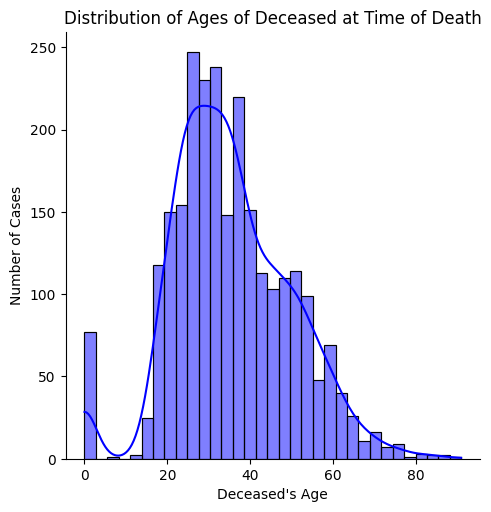

In [41]:
plt.figure(dpi=200)
sns.displot(df_fatalities,
            x='age',
            kind='hist',
            kde=True,
            color='blue')
plt.title('Distribution of Ages of Deceased at Time of Death')
plt.xlabel("Deceased's Age")
plt.ylabel('Number of Cases')

plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

In [42]:
df_fatalities.race.replace({0: 'Unknown', 'A': 'Asian', 'B': 'Black', 'H': 'Hispanic', 'N': 'Native American', 'O': 'Other', 'W': 'White'}, inplace=True)

In [43]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,is_armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,True,53.00,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,True,47.00,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,False,23.00,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,True,32.00,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,True,39.00,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


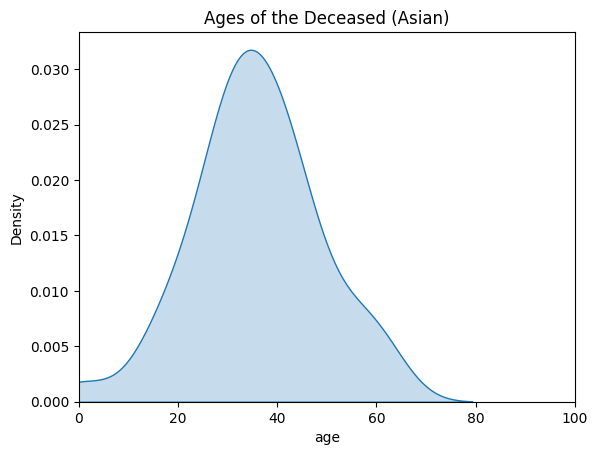

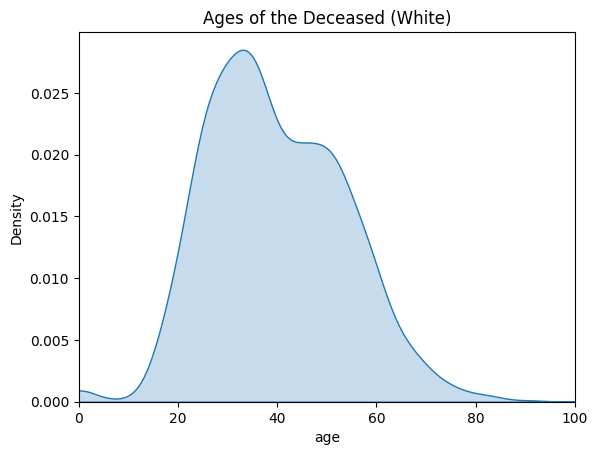

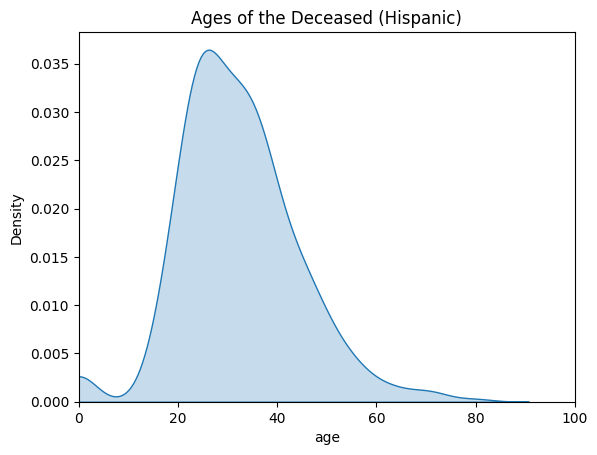

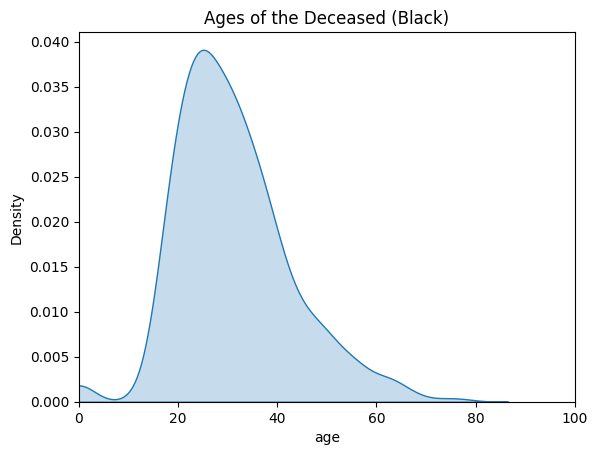

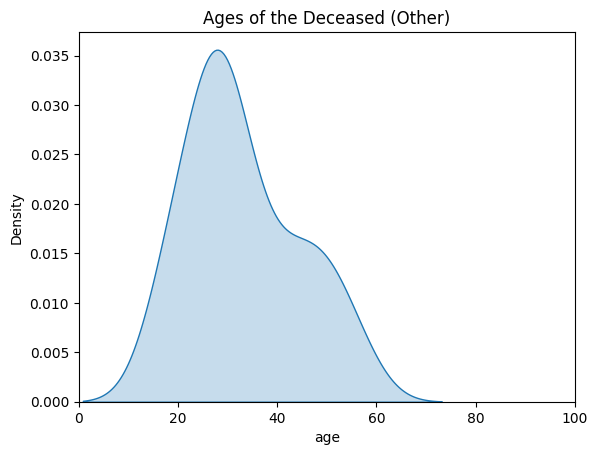

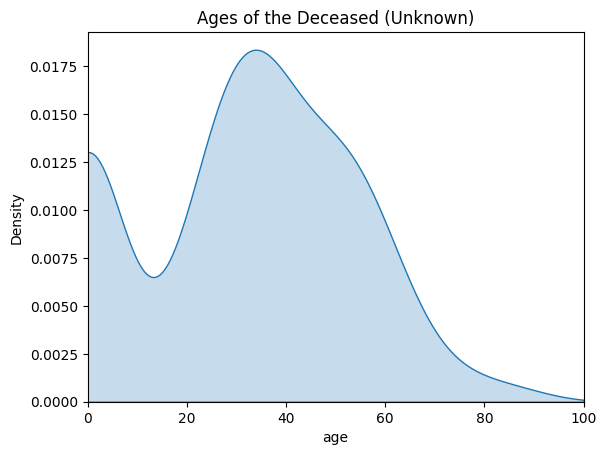

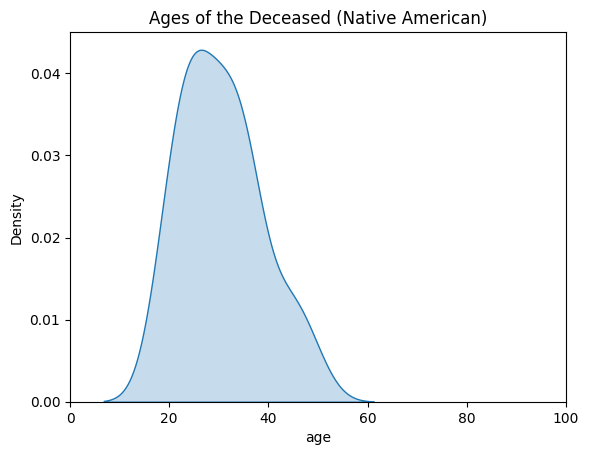

In [47]:
race_unique = df_fatalities.race.unique()
for race in race_unique:
  plt.title(f"Ages of the Deceased ({race.title()})")
  sns.kdeplot(df_fatalities[df_fatalities.race == race].age,
              fill=True,
              clip=(0, 100))
  plt.xlim(0, 100)
  plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [49]:
fatalities_by_race = df_fatalities.groupby('race').size().sort_values(ascending=False)

In [50]:
race_fatalities_bar = px.bar(x=fatalities_by_race.index,
                             y=fatalities_by_race.values,
                             title='Total Number of People Killed by Race',
                             color=fatalities_by_race.values,
                             color_continuous_scale='sunset')
race_fatalities_bar.update_layout(xaxis_title='Race',
                                  yaxis_title='Number of Cases')
race_fatalities_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [53]:
have_mental_illness = df_fatalities.groupby('signs_of_mental_illness').size()

In [59]:
mental_illness_bar = px.bar(x=have_mental_illness.index,
                            y=have_mental_illness.values,
                            color=have_mental_illness.values,
                            title='Did the deceased have signs of mental illnesses?')
mental_illness_bar.update_layout(xaxis_title='Has Mental Illness', yaxis_title='Number of Cases', coloraxis_showscale=False)
mental_illness_bar.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [62]:
top10_city_danger = df_fatalities.groupby('city').size().sort_values(ascending=False)[:10]

In [64]:
city_danger_bar = px.bar(x=top10_city_danger.index,
                         y=top10_city_danger.values,
                         color=top10_city_danger.values,
                         color_continuous_scale='teal',
                         title='Top 10 Cities with the Most Number of Fatalities by Police')
city_danger_bar.update_layout(xaxis_title='City Name', yaxis_title='Number of Cases', coloraxis_showscale=False)
city_danger_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [74]:
filtered_df_fatalities = df_fatalities[df_fatalities.city.isin(top10_city_danger.index)]
kills_race_city = filtered_df_fatalities.groupby(['city', 'race']).size().reset_index()

In [73]:
total_kills_city = filtered_df_fatalities.groupby('city').size().reset_index()

In [75]:
fatalities_city_merged = pd.merge(kills_race_city, total_kills_city, on='city')

In [79]:
fatalities_city_merged.rename(columns={'0_x': 'race_cases', '0_y': 'total_cases'}, inplace=True)

In [83]:
fatalities_city_merged['share'] = fatalities_city_merged.race_cases / fatalities_city_merged.total_cases * 100

In [99]:
race_city_bar = px.bar(fatalities_city_merged.sort_values('total_cases', ascending=False),
                       x='city',
                       y='share',
                       color='race',
                       barmode='group',
                       title='Top 10 Cities with the Most Number of Police Killings')
race_city_bar.update_layout(xaxis_title='City Name', yaxis_title='Percentage of Cases in that City (%)')
race_city_bar.show()

In [96]:
# Time period under consideration (in days):
time = (df_fatalities.date.max() - df_fatalities.date.min()).days

In [97]:
fatalities_city_merged['death_rate_yearly'] = fatalities_city_merged.total_cases / (time / 365)

In [111]:
death_rate_bar = px.bar(fatalities_city_merged.groupby(['city', 'death_rate_yearly'], as_index=False).size().sort_values('death_rate_yearly', ascending=False),
                        x='city',
                        y='death_rate_yearly',
                        color='death_rate_yearly',
                        color_continuous_scale='agsunset',
                        title='Yearly Death Rate in the Top 10 Most Dangerous Cities')
death_rate_bar.update_layout(xaxis_title='City Name',
                             yaxis_title='Death Rate')
death_rate_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [112]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,is_armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,True,53.00,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,True,47.00,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,False,23.00,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,True,32.00,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,True,39.00,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [122]:
fatalities_by_state = df_fatalities.groupby('state').size().reset_index()
fatalities_by_state = fatalities_by_state.rename(columns={0: 'fatalities'})

In [124]:
fatalities_state_map = px.choropleth(fatalities_by_state,
                                     locations='state',
                                     locationmode='USA-states',
                                     color='fatalities',
                                     color_continuous_scale='geyser',
                                     scope='usa',
                                     labels={'fatalities': 'Number of Cases of Fatal Force'},
                                     title='Number of Fatal Cases per State')

fatalities_state_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [132]:
death_year = df_fatalities.date.dt.year
df_fatalities.insert(3, 'year', death_year)

In [144]:
death_month = df_fatalities.date.dt.month
df_fatalities.insert(4, 'month', death_month)

In [145]:
fatalities_monthly = df_fatalities.groupby(['year', 'month']).size().sort_values(ascending=False).reset_index()
fatalities_monthly.rename(columns={0: 'fatalities'}, inplace=True)

In [148]:
fatalities_monthly = fatalities_monthly.sort_values(['year', 'month'], ascending=False)

In [149]:
fatalities_monthly.insert(0, 'date', pd.to_datetime(fatalities_monthly[['year', 'month']].assign(day=1)))

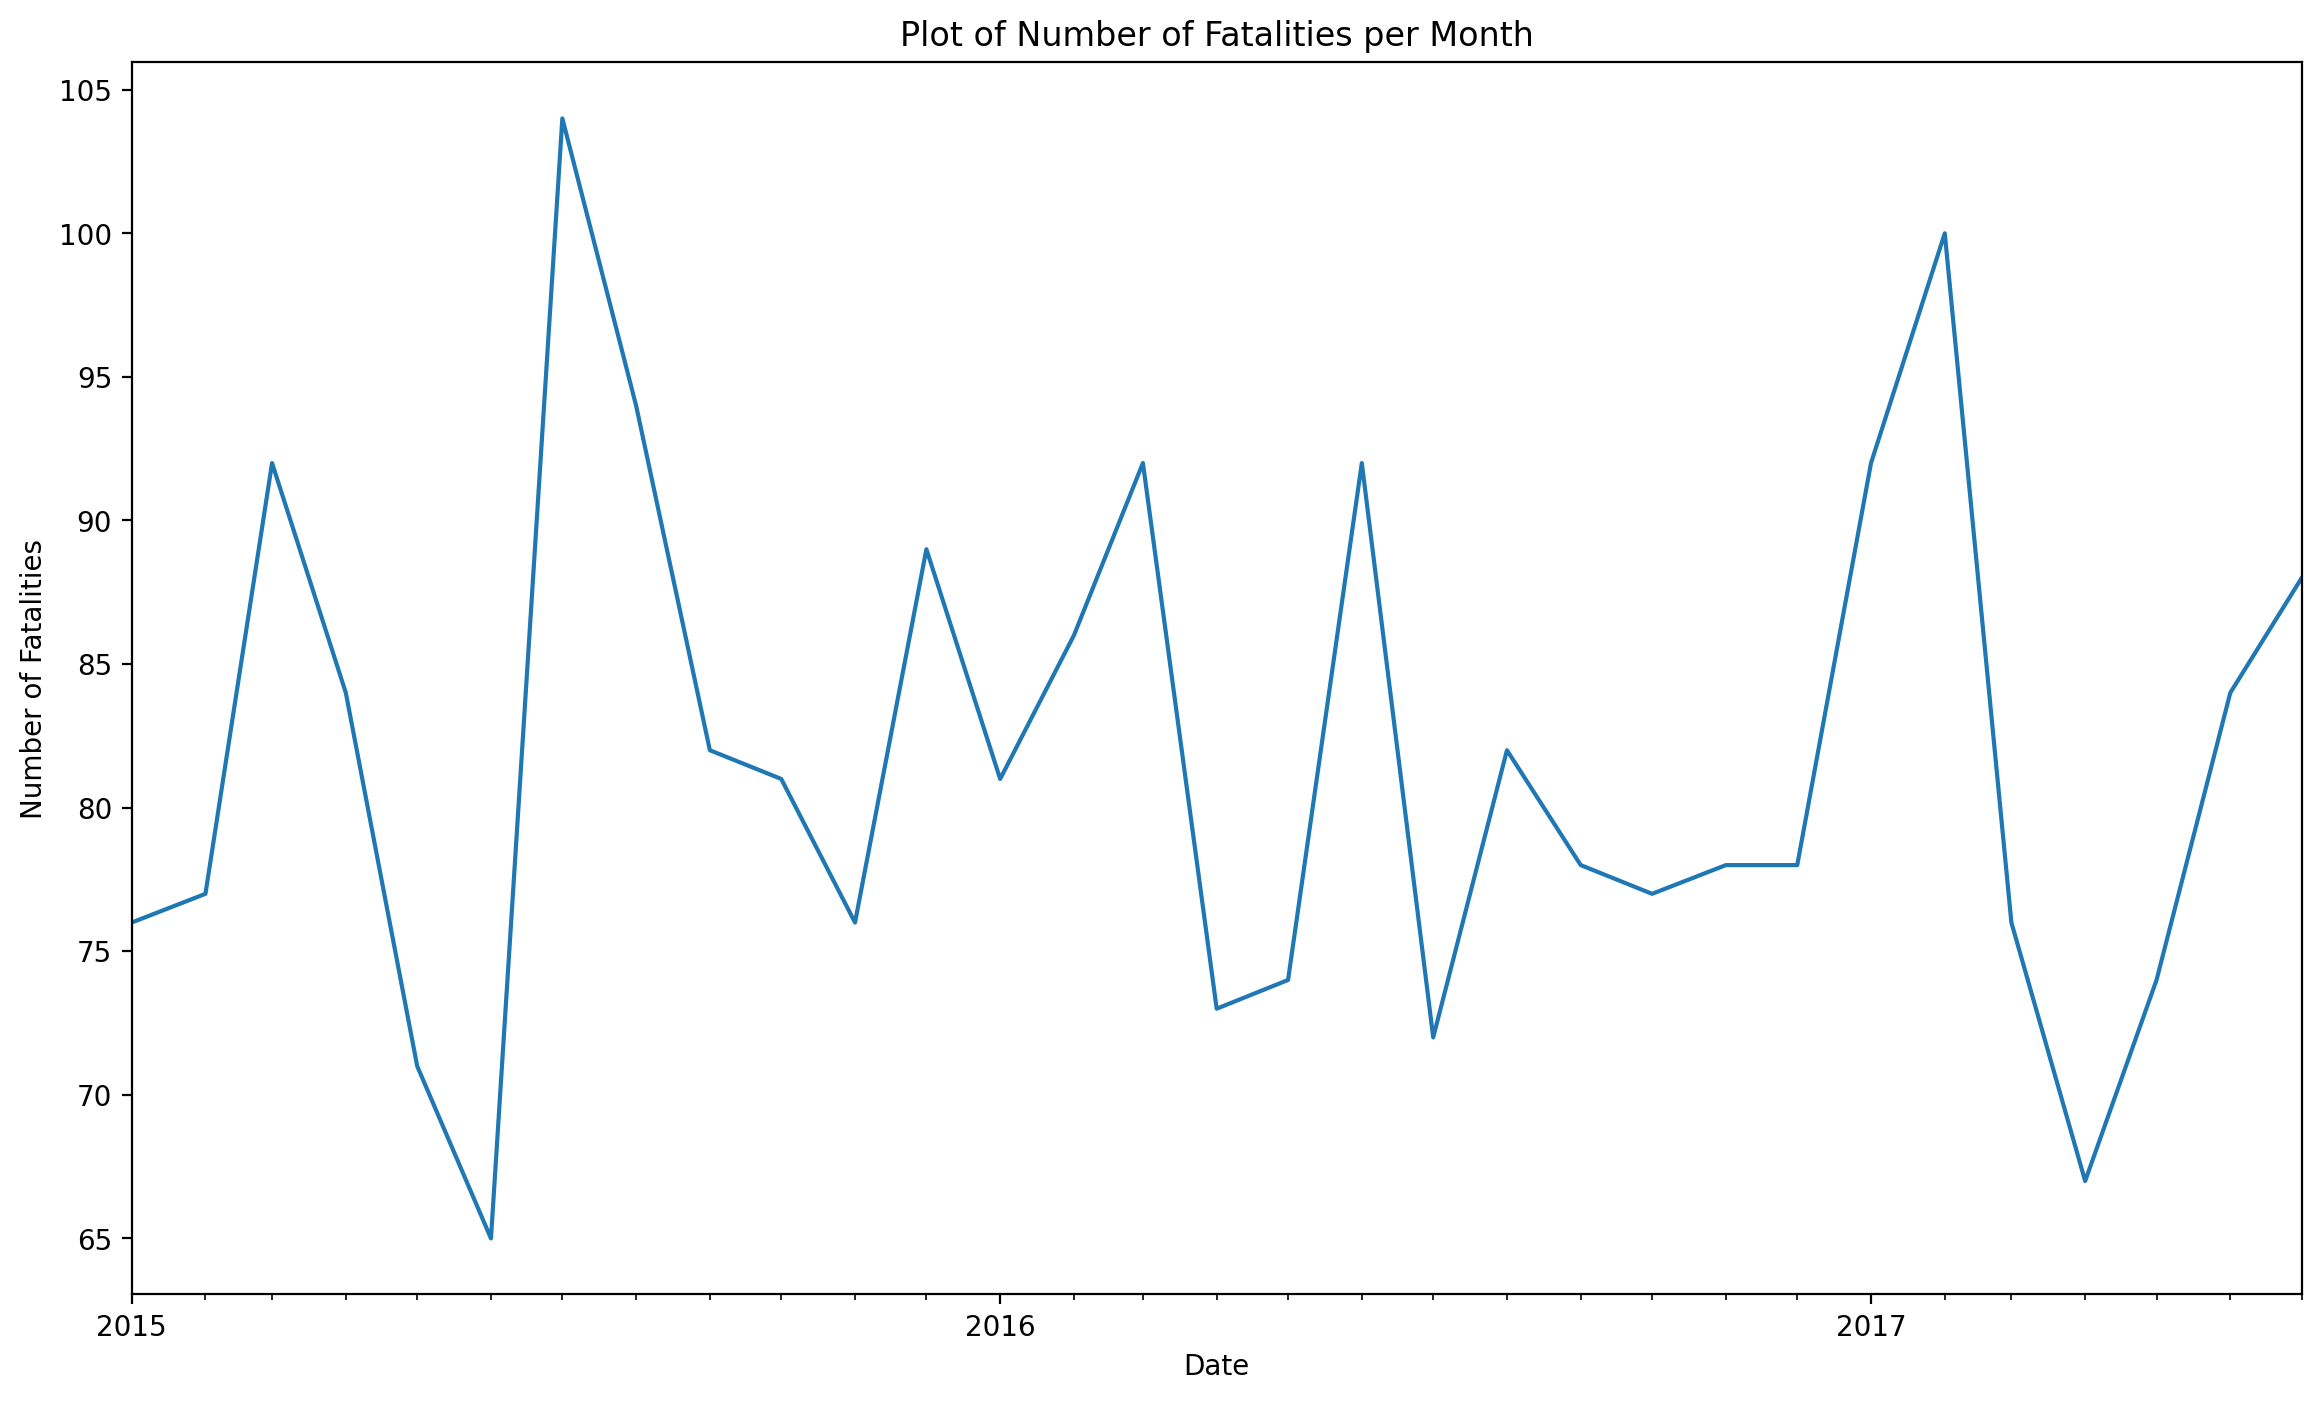

In [156]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

plt.figure(figsize=(14, 8), dpi=200)
plt.title('Plot of Number of Fatalities per Month')
plt.xlabel('Date')
plt.ylabel('Number of Fatalities')
plt.xlim(fatalities_monthly.date.min(), fatalities_monthly.date.max())

plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)
plt.gca().xaxis.set_minor_locator(months)

plt.plot(fatalities_monthly.date, fatalities_monthly.fatalities)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).